In [50]:
import matplotlib
%matplotlib inline

import math
import random

import numpy as np
import pandas as pd
import _pickle as cPickle
from collections import defaultdict

In [70]:
instances_train, instances_valid, instances_test, word_to_idx, idx_to_word, bow_idxs = cPickle.load(open('data/apnews/instances.pkl','rb'))

In [141]:
batch_l = 16
n_sents_batch = batch_l * 8

In [143]:
train_instances = get_batches(instances_train, n_sents_batch)

In [ ]:
m_sents_instances = []
for i in range(n_instances_batch)

In [ ]:
m_sents_instances = []
m_sent_instances = []
for i, (n_sents, n_sent_instances) in enumerate(n_sents_instances):
    m_sent_instances += n_sent_instances
    if len(m_sent_instances) >= int(n_batch):
        random.shuffle(m_sent_instances)
        m_sents_instances.append(m_sent_instances)
        m_sent_instances = []
    elif i == len(n_sents_instances) -1:
        m_sents_instances[-1] += m_sent_instances

assert sum([len(m_sent_instances) for m_sent_instances in m_sents_instances]) == len(instances)        

In [ ]:
m_sents_n_instances = [len(instances) for instances in m_sents_instances]
m_sents_n_instances_batch = [n_instance/n_batch for n_instance in m_sents_n_instances]

m_sents_indices = []
for n_instances, n_instances_batch in zip(m_sents_n_instances, m_sents_n_instances_batch):
    m_sent_indices = []
    for i_batch in range(math.ceil(n_batch)):
        start_index = round(i_batch * n_instances_batch)
        end_index = min(round((i_batch+1)*n_instances_batch), n_instances)
        m_sent_indices.append((start_index, end_index))
    m_sents_indices.append(m_sent_indices)

m_sents_batches = [[m_sents_instances[i][index[0]:index[1]] for index in indices]  for i, indices in enumerate(m_sents_indices)]
assert m_sents_n_instances == [sum([len(batch) for batch in m_sent_batches]) for m_sent_batches in m_sents_batches]

batches = []
for i in range(math.ceil(n_batch)):
    batch = []
    for m_sent_batches in m_sents_batches:
        m_sent_batch = m_sent_batches[i]
        batch += m_sent_batch
    batches.append((i, batch))

In [88]:
sum([len(m_sent_instances) for m_sent_instances in m_sents_instances])

26828

In [89]:
len(instances)        

26828

In [65]:
def get_batches(instances, n_sents_batch):
    "n_sents_batch: number of sentences in a batch"
    n_sents_all = sum([instance.doc_l for instance in instances_train])
    n_batch = n_sents_all/n_sents_batch

    n_sents_instances = defaultdict(list)
    for instance in instances:
        n_sents_instances[instance.doc_l].append(instance)
    n_sents_instances = sorted(n_sents_instances.items(), key=lambda x: x[0])
    
    m_sents_instances = []
    m_sent_instances = []
    for i, (n_sents, instances) in enumerate(n_sents_instances):
        m_sent_instances += instances
        if len(m_sent_instances) >= int(n_batch):
            random.shuffle(m_sent_instances)
            m_sents_instances.append(m_sent_instances)
            m_sent_instances = []
        elif i == len(n_sents_instances) -1:
            m_sents_instances[-1] += m_sent_instances

    assert sum([len(m_sent_instances) for m_sent_instances in m_sents_instances]) == len(instances)        
    
    m_sents_n_instances = [len(instances) for instances in m_sents_instances]
    m_sents_n_instances_batch = [n_instance/n_batch for n_instance in m_sents_n_instances]
    
    m_sents_indices = []
    for n_instances, n_instances_batch in zip(m_sents_n_instances, m_sents_n_instances_batch):
        m_sent_indices = []
        for i_batch in range(math.ceil(n_batch)):
            start_index = round(i_batch * n_instances_batch)
            end_index = min(round((i_batch+1)*n_instances_batch), n_instances)
            m_sent_indices.append((start_index, end_index))
        m_sents_indices.append(m_sent_indices)
    
    m_sents_batches = [[m_sents_instances[i][index[0]:index[1]] for index in indices]  for i, indices in enumerate(m_sents_indices)]
    assert m_sents_n_instances == [sum([len(batch) for batch in m_sent_batches]) for m_sent_batches in m_sents_batches]

    batches = []
    for i in range(math.ceil(n_batch)):
        batch = []
        for m_sent_batches in m_sents_batches:
            m_sent_batch = m_sent_batches[i]
            batch += m_sent_batch
        batches.append((i, batch))
        
    return batches

In [30]:
[len(m_sent_batches) for m_sent_batches in m_sents_batches]

[1334, 1334, 1334, 1334, 1334, 1334]

In [29]:
m_sents_batches

[1334, 1334, 1334, 1334, 1334, 1334]

In [60]:
stats_df = pd.DataFrame([[len(train_batch), sum([instance.doc_l for instance in train_batch])] for i, train_batch in train_batches], columns=['n_instances', 'n_sents'])

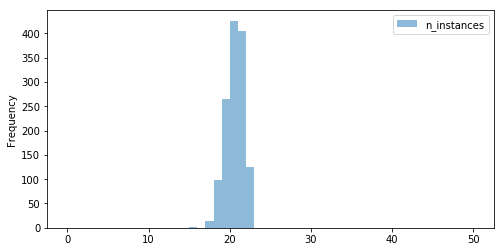

In [64]:
stats_df.plot(y=['n_instances'], bins=50, alpha=0.5, figsize=(8,4), kind='hist', range=(0, 50));

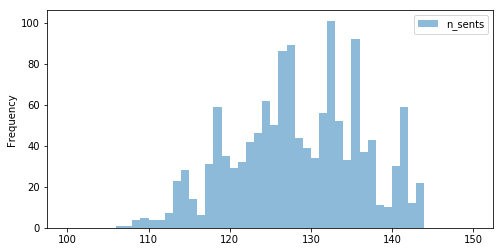

In [63]:
stats_df.plot(y=['n_sents'], bins=50, alpha=0.5, figsize=(8,4), kind='hist', range=(100, 150));